In [2]:
## License: Apache 2.0. See LICENSE file in root directory.
## Copyright(c) 2015-2017 Intel Corporation. All Rights Reserved.

#####################################################
## librealsense tutorial #1 - Accessing depth data ##
#####################################################

# First import the library
import pyrealsense2 as rs
import numpy as np

# Create a context object. This object owns the handles to all connected realsense devices
pipeline = rs.pipeline()

# Configure streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

# Start streaming
pipeline.start(config)

frames = pipeline.wait_for_frames()
depth = frames.get_depth_frame()

#     while True:
#         # This call waits until a new coherent set of frames is available on a device
#         # Calls to get_frame_data(...) and get_frame_timestamp(...) on a device will return stable values until wait_for_frames(...) is called
#         frames = pipeline.wait_for_frames()
#         depth = frames.get_depth_frame()
#         if not depth: continue

# #         # Print a simple text-based representation of the image, by breaking it into 10x20 pixel regions and approximating the coverage of pixels within one meter
# #         coverage = [0]*64
# #         for y in range(480):
# #             for x in range(640):
# #                 dist = depth.get_distance(x, y)
# #                 if 0 < dist and dist < 1:
# #                     coverage[x//10] += 1
            
# #             if y%20 is 19:
# #                 line = ""
# #                 for c in coverage:
# #                     line += " .:nhBXWW"[c//25]
# #                 coverage = [0]*64
# #                 print(line)
#     exit(0)
# #except rs.error as e:
# #    # Method calls agaisnt librealsense objects may throw exceptions of type pylibrs.error
# #    print("pylibrs.error was thrown when calling %s(%s):\n", % (e.get_failed_function(), e.get_failed_args()))
# #    print("    %s\n", e.what())
# #    exit(1)
# except Exception as e:
#     print(e)
#     pass

In [13]:
matrix = []
for y in range(480):
    row = []
    for x in range(640):
        row.append(depth.get_distance(x, y))
    matrix.append(row)
print(matrix)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [5]:
frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
depth_image = np.asanyarray(depth_frame.get_data())
cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
cv2.imshow('RealSense', depth_image)
# cv2.waitKey(1)

In [4]:
# ## License: Apache 2.0. See LICENSE file in root directory.
# ## Copyright(c) 2015-2017 Intel Corporation. All Rights Reserved.

# ###############################################
# ##      Open CV and Numpy integration        ##
# ###############################################

# import pyrealsense2 as rs
# import numpy as np
import cv2

# # Configure depth and color streams
# pipeline = rs.pipeline()
# config = rs.config()

# # Get device product line for setting a supporting resolution
# pipeline_wrapper = rs.pipeline_wrapper(pipeline)
# pipeline_profile = config.resolve(pipeline_wrapper)
# device = pipeline_profile.get_device()
# device_product_line = str(device.get_info(rs.camera_info.product_line))

# found_rgb = False
# for s in device.sensors:
#     if s.get_info(rs.camera_info.name) == 'RGB Camera':
#         found_rgb = True
#         break
# if not found_rgb:
#     print("The demo requires Depth camera with Color sensor")
#     exit(0)

# config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

# if device_product_line == 'L500':
#     config.enable_stream(rs.stream.color, 960, 540, rs.format.bgr8, 30)
# else:
#     config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# # Start streaming
# pipeline.start(config)

# try:
#     while True:

#         # Wait for a coherent pair of frames: depth and color
#         frames = pipeline.wait_for_frames()
#         depth_frame = frames.get_depth_frame()
#         color_frame = frames.get_color_frame()
#         if not depth_frame or not color_frame:
#             continue

#         # Convert images to numpy arrays
#         depth_image = np.asanyarray(depth_frame.get_data())
#         color_image = np.asanyarray(color_frame.get_data())

#         # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
#         depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

#         depth_colormap_dim = depth_colormap.shape
#         color_colormap_dim = color_image.shape

#         # If depth and color resolutions are different, resize color image to match depth image for display
#         if depth_colormap_dim != color_colormap_dim:
#             resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
#             images = np.hstack((resized_color_image, depth_colormap))
#         else:
#             images = np.hstack((color_image, depth_colormap))

#         # Show images
#         cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
#         cv2.imshow('RealSense', images)
#         cv2.waitKey(1)

# finally:

#     # Stop streaming
#     pipeline.stop()

In [14]:
## License: Apache 2.0. See LICENSE file in root directory.
## Copyright(c) 2015-2017 Intel Corporation. All Rights Reserved.

###############################################
##      Open CV and Numpy integration        ##
###############################################

import pyrealsense2 as rs
import numpy as np
import cv2

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

if device_product_line == 'L500':
    config.enable_stream(rs.stream.color, 960, 540, rs.format.bgr8, 30)
else:
    config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
pipeline.start(config)

try:
    while True:

        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

        # Apply colormap on depth image (image must be converted to 8-bit per pixel first)
        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

        depth_colormap_dim = depth_colormap.shape
        color_colormap_dim = color_image.shape

        # If depth and color resolutions are different, resize color image to match depth image for display
        if depth_colormap_dim != color_colormap_dim:
            resized_color_image = cv2.resize(color_image, dsize=(depth_colormap_dim[1], depth_colormap_dim[0]), interpolation=cv2.INTER_AREA)
            images = np.hstack((resized_color_image, depth_colormap))
        else:
            images = np.hstack((color_image, depth_colormap))

        # Show images
        cv2.namedWindow('RealSense', cv2.WINDOW_AUTOSIZE)
        cv2.imshow('RealSense', images)
        cv2.waitKey(1)

finally:

    # Stop streaming
    pipeline.stop()

RuntimeError: Frame didn't arrive within 5000

In [3]:
cv2.waitKey?

In [4]:
depth_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

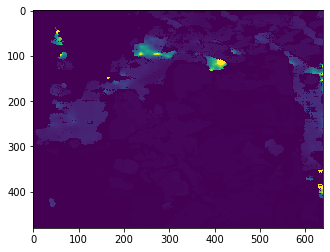

In [6]:
from matplotlib import pyplot as plt
plt.imshow(depth_image, interpolation='nearest')
plt.show()

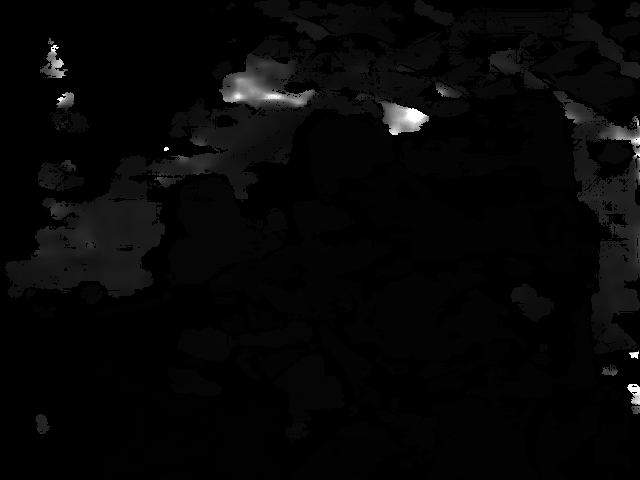

In [5]:
from PIL import Image
import pyrealsense2 as rs
import numpy as np

# Create a context object. This object owns the handles to all connected realsense devices
pipeline = rs.pipeline()

# Configure streams
config = rs.config()
config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

# Start streaming
pipeline.start(config)

frames = pipeline.wait_for_frames()
depth_frame = frames.get_depth_frame()
depth_image = np.asanyarray(depth_frame.get_data())

im = Image.fromarray(depth_image)
im.save("test_image.png")
im

In [2]:
import pyrealsense2 as rs
import numpy as np
import cv2
from PIL import Image

# Configure depth and color streams
pipeline = rs.pipeline()
config = rs.config()

# Get device product line for setting a supporting resolution
pipeline_wrapper = rs.pipeline_wrapper(pipeline)
pipeline_profile = config.resolve(pipeline_wrapper)
device = pipeline_profile.get_device()
device_product_line = str(device.get_info(rs.camera_info.product_line))

found_rgb = False
for s in device.sensors:
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        found_rgb = True
        break
if not found_rgb:
    print("The demo requires Depth camera with Color sensor")
    exit(0)

config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

if device_product_line == 'L500':
    config.enable_stream(rs.stream.color, 960, 540, rs.format.bgr8, 30)
else:
    config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)

# Start streaming
# pipeline.start(config)

try:
    pipeline.start(config)
    for i in range(90):

        # Wait for a coherent pair of frames: depth and color
        frames = pipeline.wait_for_frames()
        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()
        if not depth_frame or not color_frame:
            continue

        # Convert images to numpy arrays
        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())

#         depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)

        

        depth_image = np.asanyarray(depth_frame.get_data())

        im = Image.fromarray(depth_colormap)
        im.save("test_image.png")
        # If depth and color resolutions are different, resize color image to match depth image for display
#     pipeline.stop()

finally:

    # Stop streaming
    pipeline.stop()
im

RuntimeError: Frame didn't arrive within 5000

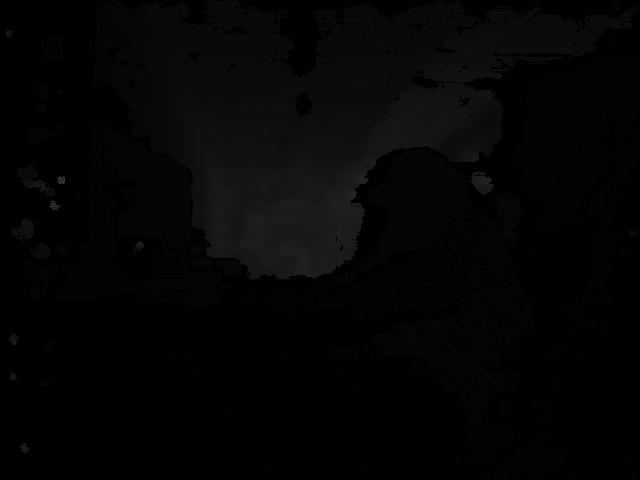

In [16]:
im

In [26]:
## License: Apache 2.0. See LICENSE file in root directory.
## Copyright(c) 2015-2017 Intel Corporation. All Rights Reserved.

#####################################################
## librealsense tutorial #1 - Accessing depth data ##
#####################################################

# First import the library
import pyrealsense2 as rs
from PIL import Image
import numpy as np
import cv2
im = []

try:
    # Create a context object. This object owns the handles to all connected realsense devices
    pipeline = rs.pipeline()

    # Configure streams
    config = rs.config()
    config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)

    # Start streaming
    pipeline.start(config)

    while True:
        # This call waits until a new coherent set of frames is available on a device
        # Calls to get_frame_data(...) and get_frame_timestamp(...) on a device will return stable values until wait_for_frames(...) is called
        frames = pipeline.wait_for_frames()
        depth = frames.get_depth_frame()
        if not depth: continue

        # Print a simple text-based representation of the image, by breaking it into 10x20 pixel regions and approximating the coverage of pixels within one meter
        depth_image = np.asanyarray(depth.get_data())

        depth_colormap = cv2.applyColorMap(cv2.convertScaleAbs(depth_image, alpha=0.03), cv2.COLORMAP_JET)


        im = Image.fromarray(depth_colormap)
        im2 = Image.fromarray(depth_image)
        im2.save("test_image_cont.png")
#     exit(0)
#except rs.error as e:
#    # Method calls agaisnt librealsense objects may throw exceptions of type pylibrs.error
#    print("pylibrs.error was thrown when calling %s(%s):\n", % (e.get_failed_function(), e.get_failed_args()))
#    print("    %s\n", e.what())
#    exit(1)
except Exception as e:
    print(e)
    pass
im

KeyboardInterrupt: 